In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 데이터셋 로드

In [2]:
data = sns.load_dataset('mpg')
data.shape

(398, 9)

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
# 결측치의 합계

data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

### 결측치 제거

In [5]:
data = data.dropna()
data.shape

(392, 9)

### 수치 데이터만 가져오기

- 머신러닝이나 딥러닝 모델은 내부에서 수치계산을 하기 때문에 숫자가 아닌 데이터를 넣어주면 모델이 학습과 예측을 할 수 없음.

In [6]:
# select_dtypes를 통해 object 타입을 제외하고 가져옴

data = data.select_dtypes(exclude = 'object')
data.shape

(392, 7)

### 전체 데이터에 대한 기술 통계 확인

In [7]:
data.describe(include = 'all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


### 데이터셋 나누기

In [8]:
# train_dataset : 학습에 사용
# test_dataset : 실제 예측에 사용

train_dataset = data.sample(frac = 0.8, random_state = 42)
train_dataset.shape

(314, 7)

In [9]:
test_dataset = data.drop(train_dataset.index)
test_dataset.shape

(78, 7)

### target 추출

In [10]:
train_labels = train_dataset.pop('mpg')
train_labels.shape

(314,)

In [11]:
test_labels = test_dataset.pop('mpg')
test_labels.shape

(78,)

In [12]:
train_dataset.shape, test_dataset.shape

((314, 6), (78, 6))

In [13]:
train_dataset.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year
79,4,96.0,69.0,2189,18.0,72
276,4,121.0,115.0,2795,15.7,78
248,4,91.0,60.0,1800,16.4,78
56,4,91.0,70.0,1955,20.5,71
393,4,140.0,86.0,2790,15.6,82


In [14]:
train_labels.head()

79     26.0
276    21.6
248    36.1
56     26.0
393    27.0
Name: mpg, dtype: float64

### 딥러닝 모델 만들기

In [15]:
import tensorflow as tf
tf.__version__

'2.6.0'

#### 딥러닝 층 구성

In [23]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation = 'relu', input_shape = [len(train_dataset.keys())])) # 입력하는 변수의 개수
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(1))

#### 모델 컴파일

In [24]:
model.compile(loss = 'mse', metrics = ['mae', 'mse'])

#### 모델 확인

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


#### 딥러닝 모델로 학습

In [29]:
model.fit(train_dataset, train_labels, epochs = 100, verbose = 1)

Epoch 1/100
10/10 [==============================] - 0s 1ms/step - loss: 716.3177 - mae: 23.4658 - mse: 716.3177
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 434.1243 - mae: 17.0017 - mse: 434.1243
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 732.5390 - mae: 22.7777 - mse: 732.5390
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 625.9254 - mae: 21.2529 - mse: 625.9254
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 648.3026 - mae: 20.9410 - mse: 648.3026
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 290.8662 - mae: 14.2567 - mse: 290.8662
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 659.6659 - mae: 22.1550 - mse: 659.6659
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 453.7119 - mae: 17.9533 - mse: 453.7119
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 515.1760 - mae: 19.7582

10/10 [==============================] - 0s 1ms/step - loss: 50.5431 - mae: 5.4749 - mse: 50.5431
Epoch 73/100
10/10 [==============================] - 0s 1ms/step - loss: 36.1905 - mae: 4.7260 - mse: 36.1905
Epoch 74/100
10/10 [==============================] - 0s 2ms/step - loss: 63.7105 - mae: 6.3583 - mse: 63.7105
Epoch 75/100
10/10 [==============================] - 0s 1ms/step - loss: 50.7779 - mae: 5.6088 - mse: 50.7779
Epoch 76/100
10/10 [==============================] - 0s 1ms/step - loss: 43.8703 - mae: 5.2753 - mse: 43.8703
Epoch 77/100
10/10 [==============================] - 0s 1ms/step - loss: 49.6916 - mae: 5.3102 - mse: 49.6916
Epoch 78/100
10/10 [==============================] - 0s 1ms/step - loss: 34.6675 - mae: 4.4862 - mse: 34.6675
Epoch 79/100
10/10 [==============================] - 0s 1ms/step - loss: 54.7500 - mae: 5.8232 - mse: 54.7500
Epoch 80/100
10/10 [==============================] - 0s 1ms/step - loss: 44.8461 - mae: 5.1768 - mse: 44.8461
Epoch 81/100
1

#### 딥러닝 모델로 평가

In [30]:
model.evaluate(test_dataset, test_labels)

3/3 [==============================] - 0s 2ms/step - loss: 28.9106 - mae: 4.3188 - mse: 28.9106


[28.910585403442383, 4.318787574768066, 28.910585403442383]

#### 딥러닝 모델의 예측

In [31]:
predict_labels = model.predict(test_dataset).flatten()
predict_labels[:5]

array([16.895132, 14.332577, 30.187517, 28.434921, 19.235752],
      dtype=float32)

#### 딥러닝 모델의 예측결과 평가하기

<AxesSubplot:xlabel='mpg'>

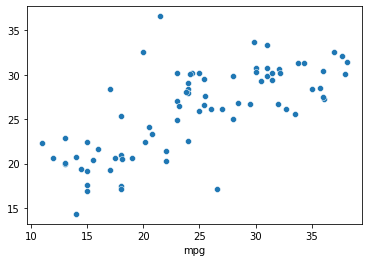

In [32]:
sns.scatterplot(x = test_labels, y = predict_labels)

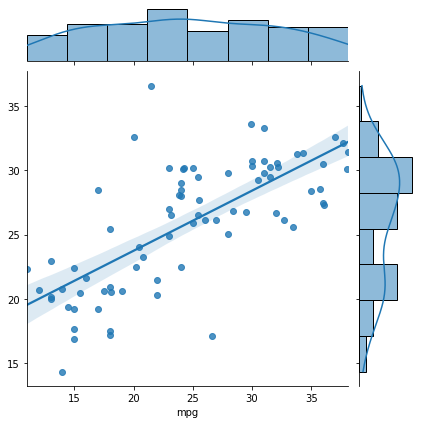

In [33]:
sns.jointplot(x = test_labels, y = predict_labels, kind = 'reg')